# Get data from Amazon product co-purchasing network metadata

In [7]:
from src.parser import *
import simplejson
import subprocess

from src.utils import select_from_fulldump
from src.insert_data import insert_from_dict_gen

from src.query import q_a, q_c

In [2]:
file_path = "data/amazon-meta.txt.gz"
result = subprocess.Popen('wc -l data/amazon-meta.txt.gz', shell=True, stdout=subprocess.PIPE)
n_lines = int([l for l in result.stdout][0].decode().split()[0])

dumps = [e for e in parse(file_path, total=n_lines) if e]
n_dumps = len(dumps)

print('lines:', n_lines)
print('number of dumps:', n_dumps)
# print(simplejson.dumps(dumps[1], indent=2))

15010574it [00:39, 383294.24it/s]

lines: 770519
number of dumps: 548552


# insert dumps into psql

In [3]:
!python3 src/create_schema.py

# number os dumps
n = n_dumps

prods = select_from_fulldump(dumps, 'products', n)
cats = select_from_fulldump(dumps, 'categories', n)
revs = select_from_fulldump(dumps, 'reviews', n)

insert_from_dict_gen('products', prods)
insert_from_dict_gen('categories', cats)
insert_from_dict_gen('reviews', revs)

  File "src/create_schema.py", line 3
    import psycopg2
    ^
IndentationError: unexpected indent


548552it [00:47, 11662.89it/s]
100%|██████████| 51/51 [00:00<00:00, 10128.29it/s]


# Dash BOard

(a) Dado produto, listar os 5 comentários mais úteis e com maior avaliação e os 5 comentários mais úteis e com menor avaliação

(b) Dado um produto, listar os produtos similares com maiores vendas do que ele

(c) Dado um produto, mostrar a evolução diária das médias de avaliação ao longo do intervalo de tempo coberto no arquivo de entrada

(d) Listar os 10 produtos lideres de venda em cada grupo de produtos

(e) Listar os 10 produtos com a maior média de avaliações úteis positivas por produto

(f) Listar a 5 categorias de produto com a maior média de avaliações úteis positivas por produto

(g) Listar os 10 clientes que mais fizeram comentários por grupo de produto

In [4]:
product_id = 8
a = q_a(product_id)
a

,product_id,time,customer_id,rating,votes,helpful
0,8,2000-11-19,AL5D52NA8F67F,5,16,13
5,8,2000-11-19,AL5D52NA8F67F,5,16,13
1,8,2000-11-01,A1OZQCZAK21S6M,5,13,12
6,8,2000-11-01,A1OZQCZAK21S6M,5,13,12
2,8,2001-10-25,AL5OEDM8TPTKV,5,10,10
7,8,2001-10-25,AL5OEDM8TPTKV,5,10,10
3,8,2000-10-31,A2F1X6YFCJZ1FH,5,10,9
8,8,2000-10-31,A2F1X6YFCJZ1FH,5,10,9
4,8,2001-12-24,A2WKESDGF2YC8S,5,8,8
9,8,2001-12-24,A2WKESDGF2YC8S,5,8,8


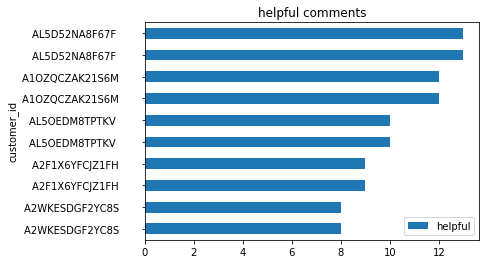

In [5]:
a[::-1].plot.barh(title='helpful comments', x='customer_id', y='helpful');

In [8]:
c = q_c(product_id)
c

,time,avg_rating
12,2000-11-19,5.000000
13,2000-11-01,5.000000
14,2000-10-31,5.000000
3,2001-12-31,4.666667
4,2001-12-24,4.636364
2,2002-04-09,4.615385
5,2001-11-03,4.600000
6,2001-10-25,4.555556
7,2001-09-13,4.500000
0,2003-09-03,4.466667


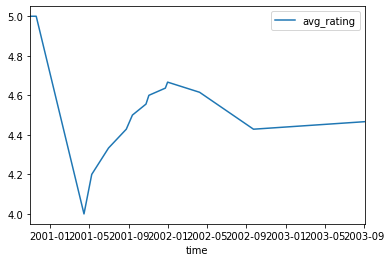

In [9]:
c.plot(x='time', y='avg_rating');